<a href="https://colab.research.google.com/github/FazleRabbbiferdaus172/Deep_learning/blob/main/VGG16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [68]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [69]:
import torch
import torchvision
import torchvision.transforms as transforms
from torchvision.datasets.utils import download_url
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import random_split
from torch.utils.data import DataLoader
import torch.optim as optim
import torchvision.datasets as datasets

In [95]:

VGG16 = [64,64,'M',128,128,'M',256,256,256,'M',512,512,512,'M',512,512,512,'M']


class VGG_net(nn.Module):
  def __init__(self, in_channels=3, num_classes=10):
    super(VGG_net, self).__init__()
    self.in_channels = in_channels
    self.conv_layers = self.create_conv_layers(VGG16)
    self.fcs = nn.Sequential(
        nn.Linear(512*1*1, 4096), nn.ReLU(), nn.Dropout(p=0.5),
        nn.Linear(4096,4096), nn.ReLU(), nn.Dropout(p=0.5),
        nn.Linear(4096, num_classes)
    )

  def forward(self, x):
    x = self.conv_layers(x)
    x = x.reshape(x.shape[0], -1)
    x = self.fcs(x)
    return x
  
  def create_conv_layers(self, architecture):
    layers = []
    in_channels = self.in_channels

    for x in architecture:
        if x != 'M':
            out_channels = x

            layers += [nn.Conv2d(in_channels=in_channels, out_channels=out_channels,
                                 kernel_size=(3,3), stride=(1,1), padding=(1,1)),
                       nn.ReLU()]
            
            in_channels = x
        elif x == 'M':
            layers += [nn.MaxPool2d(kernel_size=(2,2), stride=(2,2))]

    return nn.Sequential(*layers)

#net = VGG_net()
#net.to(device)
#x = torch.randn(1,3,32,32)
#print(x.ndimension())
#print(net(x).shape)


# set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Hyperparameters
in_channel = 3
#num_classes = 
learning_rate = float(1e-2)
batch_size = 256
num_epochs = 80


net = VGG_net().to(device)
net.to(device)
x = torch.randn(1,3,32,32).to(device)
#print(x.ndimension())
print(net(x).shape)


torch.Size([1, 10])


In [96]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


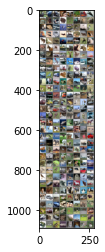

 bird   car   car   cat


In [97]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [98]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=learning_rate, momentum=0.9)

In [99]:
for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data[0].to(device), data[1].to(device)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        #inputs = inputs.view(1, -1)
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        #print(i, running_loss)
        if i % 2000 == 1999:    # print every 256 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

Finished Training


In [100]:
PATH = './vgg_net.pth'
torch.save(net.state_dict(), PATH)

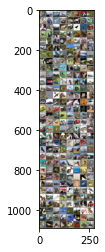

GroundTruth:    cat  ship  ship plane


In [101]:
dataiter = iter(testloader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [102]:
net = VGG_net()
net.load_state_dict(torch.load(PATH))

<All keys matched successfully>

In [103]:
outputs = net(images)

In [105]:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(256)))

Predicted:  plane  ship  ship  ship  ship  ship plane  ship  ship plane plane  ship plane plane plane plane  ship  ship plane  ship  ship plane plane  ship plane  ship plane plane plane plane  ship plane plane plane  ship  ship plane  ship plane  ship plane  ship plane plane plane plane plane plane  ship plane  ship  ship plane  frog plane plane  ship  ship plane  ship  ship plane  ship  ship  ship plane plane plane plane  ship plane  ship plane  ship plane plane  ship  ship plane  ship plane plane  ship plane  ship  ship plane  ship plane  ship  ship plane  ship  ship  ship plane plane  ship plane  ship  ship  ship  ship  ship  ship  ship  ship  ship plane plane plane  ship plane plane  ship  ship  ship plane  ship plane plane  ship plane  ship  ship  ship plane  ship plane  ship  ship  ship  ship  ship plane  ship  ship  ship  ship plane plane plane  ship plane plane plane plane plane plane  ship plane plane plane  ship  ship plane  ship  ship  ship  ship plane plane  ship  ship plan

In [108]:
net = VGG_net().to(device)

In [111]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data[0].to(device), data[1].to(device)
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 9 %


In [ ]:
!nvcc --version

print(float(1e-2))

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2019 NVIDIA Corporation
Built on Sun_Jul_28_19:07:16_PDT_2019
Cuda compilation tools, release 10.1, V10.1.243
0.01
